In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import plotly.express as px 

import datasets

In [2]:
df=pd.read_csv("c:/Users/HP/OneDrive/Desktop/data analytics/projects/Finance Domain project/financial_loan.csv")

In [3]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


metadata of data

In [4]:
print("no of rows:",df.shape[0])

no of rows: 38576


In [5]:
df.shape

(38576, 24)

In [6]:
print("no of columns:",df.shape[1])

no of columns: 24


In [7]:
df.isnull().sum()

id                          0
address_state               0
application_type            0
emp_length                  0
emp_title                1438
grade                       0
home_ownership              0
issue_date                  0
last_credit_pull_date       0
last_payment_date           0
loan_status                 0
next_payment_date           0
member_id                   0
purpose                     0
sub_grade                   0
term                        0
verification_status         0
annual_income               0
dti                         0
installment                 0
int_rate                    0
loan_amount                 0
total_acc                   0
total_payment               0
dtype: int64

In [8]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership  issue_date  \
0                                Ryder     C           RENT  11-02-2021   
1                       MKC Accounting     E           RENT  01-01-2021   
2                Chema

DATA TYPES

In [9]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

In [10]:
df['issue_date']=pd.to_datetime(df['issue_date'],dayfirst=True)
df['last_credit_pull_date']=pd.to_datetime(df['last_credit_pull_date'],dayfirst=True)
df['last_payment_date']=pd.to_datetime(df['last_payment_date'],dayfirst=True)
df['next_payment_date']=pd.to_datetime(df['next_payment_date'],dayfirst=True)

In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
id,38576.0,681037.061385,54734.0,513517.0,662728.0,836506.0,1077501.0,211324.578218
issue_date,38576,2021-07-16 02:31:35.562007040,2021-01-01 00:00:00,2021-04-11 00:00:00,2021-07-11 00:00:00,2021-10-11 00:00:00,2021-12-12 00:00:00,NaN
last_credit_pull_date,38576,2021-06-08 13:36:34.193280512,2021-01-08 00:00:00,2021-04-15 00:00:00,2021-05-16 00:00:00,2021-08-13 00:00:00,2022-01-20 00:00:00,NaN
last_payment_date,38576,2021-06-26 09:52:08.909166080,2021-01-08 00:00:00,2021-03-16 00:00:00,2021-06-14 00:00:00,2021-09-15 00:00:00,2021-12-15 00:00:00,NaN
next_payment_date,38576,2021-07-26 20:42:20.605557760,2021-02-08 00:00:00,2021-04-16 00:00:00,2021-07-14 00:00:00,2021-10-15 00:00:00,2022-01-15 00:00:00,NaN
member_id,38576.0,847651.506299,70699.0,662978.75,847356.5,1045652.5,1314167.0,266810.45686
annual_income,38576.0,69644.54031,4000.0,41500.0,60000.0,83200.5,6000000.0,64293.681045
dti,38576.0,0.133274,0.0,0.0821,0.1342,0.1859,0.2999,0.066662
installment,38576.0,326.862965,15.69,168.45,283.045,434.4425,1305.19,209.092
int_rate,38576.0,0.120488,0.0542,0.0932,0.1186,0.1459,0.2459,0.037164


Total Loan Application

In [12]:
total_loan_applications=df['id'].count()
print('total loan applications:',total_loan_applications)

total loan applications: 38576


MTD Total Loan Applications

In [13]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

In [14]:
latest_issue_date


Timestamp('2021-12-12 00:00:00')

In [15]:
latest_year


2021

In [16]:
latest_month

12

In [17]:
mtd_data=df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

In [18]:
mtd_data

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
13,1020855,CA,INDIVIDUAL,5 years,henkel corporation,B,RENT,2021-12-11,2021-12-14,2021-12-14,...,B5,36 months,Not Verified,48000.0,0.1533,268.36,0.1269,8000,15,9661
15,1060995,RI,INDIVIDUAL,< 1 year,HSA-UWC,B,RENT,2021-12-11,2021-02-14,2021-10-13,...,B4,36 months,Source Verified,60000.0,0.0630,400.99,0.1242,12000,14,9547
16,1046507,TX,INDIVIDUAL,1 year,Child's Day,B,RENT,2021-12-02,2021-04-16,2021-12-14,...,B1,36 months,Verified,16800.0,0.0350,98.29,0.0991,3050,8,3538
18,1059497,FL,INDIVIDUAL,10+ years,Sandestin Beach Hilton,B,MORTGAGE,2021-12-12,2021-12-14,2021-12-14,...,B2,36 months,Verified,35000.0,0.1392,162.87,0.1065,5000,23,5863
42,472634,FL,INDIVIDUAL,1 year,walmart,A,RENT,2021-12-09,2021-04-11,2021-11-10,...,A1,36 months,Not Verified,12720.0,0.0000,231.75,0.0705,7500,9,2073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38496,1026558,CA,INDIVIDUAL,4 years,"ACCES I/O Products, Inc.",B,MORTGAGE,2021-12-11,2021-10-14,2021-09-14,...,B4,60 months,Verified,54600.0,0.1209,561.44,0.1242,25000,19,31693
38516,633392,CT,INDIVIDUAL,10+ years,CVS Pharmacy,B,OWN,2021-12-10,2021-12-15,2021-01-16,...,B5,60 months,Verified,40000.0,0.0885,149.98,0.1036,7000,21,8998
38531,1052169,NY,INDIVIDUAL,1 year,Binder and Binder,C,RENT,2021-12-11,2021-01-12,2021-01-12,...,C1,60 months,Verified,50000.0,0.1922,460.10,0.1349,20000,39,20226
38535,624384,MA,INDIVIDUAL,4 years,"CH Newton Builders, Inc",C,RENT,2021-12-10,2021-05-16,2021-04-15,...,C4,60 months,Verified,43160.0,0.0189,229.33,0.1335,10000,5,13490


In [19]:
mtd_loan_applications=mtd_data['id'].count()

In [20]:
print("MTD loan applications",mtd_loan_applications)


MTD loan applications 4314


Total Funded Amount

In [21]:
total_funded_amount=df['loan_amount'].sum()
total_funded_amount_millions=total_funded_amount/1000000

In [22]:
print("total_funded_amount: ${:.2f}M". format(total_funded_amount_millions))

total_funded_amount: $435.76M


MTD - Total Funded Amount

In [23]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month
mtd_data=df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_funded_amount=mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions=mtd_total_funded_amount/1000000
print("MTD Total Funded Amount:${:.2f}M".format(mtd_total_funded_amount_millions))

MTD Total Funded Amount:$53.98M


Total Amount Recieved

In [24]:
total_amount_recieved=df['loan_amount'].sum()
total_amount_recieved_millions=total_amount_recieved/1000000
print("total_amount_recieved: ${:.2f}M". format(total_amount_recieved_millions))

total_amount_recieved: $435.76M


MTD - Total Amount Recieved

In [25]:
latest_issue_date=df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month
mtd_data=df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_total_amount_recieved=mtd_data['total_payment'].sum()
mtd_total_amount_recieved_millions=mtd_total_amount_recieved/1000000
print("MTD total amount recieved:${:.2f}M".format(mtd_total_amount_recieved_millions))

MTD total amount recieved:$58.07M


Average Interest Rate

In [26]:
average_interst_rate=df['int_rate'].mean()*100
print("Average Interst Rate:{:.2f}%".format(average_interst_rate))

Average Interst Rate:12.05%


Average Debt-to-income Ratio (DTI)

In [27]:
average_dti=df['dti'].mean()*100
print("Average DTI:{:.2f}%".format(average_dti))

Average DTI:13.33%


Good Loan Matrices

In [28]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received / 1000000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (in Millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions): ${:.2f}M".format(good_loan_received_millions))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


BAD Loan Metrices

In [29]:
Bad_loans = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()

Bad_loan_applications = Bad_loans['id'].count()
Bad_loan_funded_amount = Bad_loans['loan_amount'].sum()
Bad_loan_received = Bad_loans['total_payment'].sum()

Bad_loan_funded_amount_millions = Bad_loan_funded_amount / 1000000
Bad_loan_received_millions = Bad_loan_received / 1000000

Bad_loan_percentage = (Bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", Bad_loan_applications)
print("Bad Loan Funded Amount (in Millions): ${:.2f}M".format(Bad_loan_funded_amount_millions))
print("Bad Loan Total Received (in Millions): ${:.2f}M".format(Bad_loan_received_millions))
print("Percentage of Bad Loan Applications: {:.2f}%".format(Bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Received (in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


Monthly Trends By Issue Date For Funded Amount

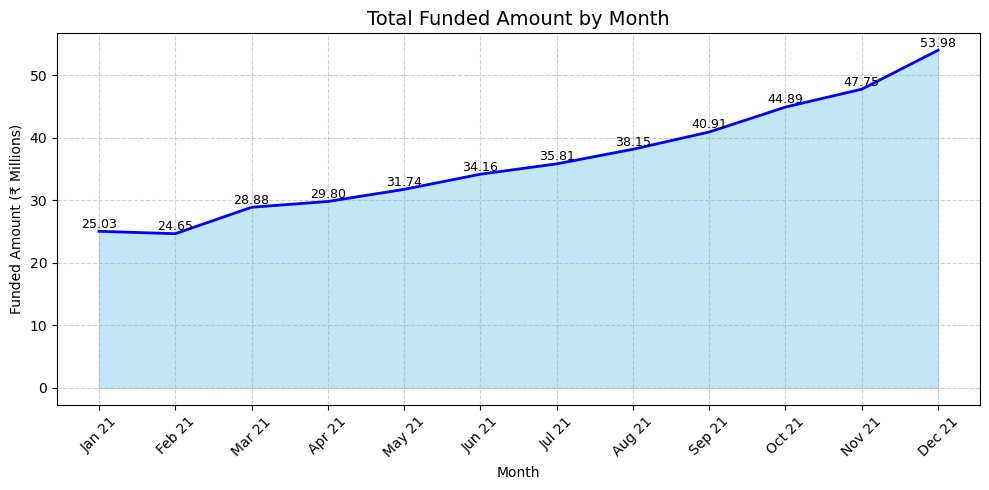

In [30]:
# Assuming 'df' is a pandas DataFrame with 'issue_date' and 'loan_amount' columns.
# 'issue_date' should be a datetime type.

# 1. Data Processing
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1000000)
    .reset_index(name='loan_amount_millions')
)

# 2. Data Visualization
plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (₹ Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Monthly Trends By Issue Date For Total Amount Recieved

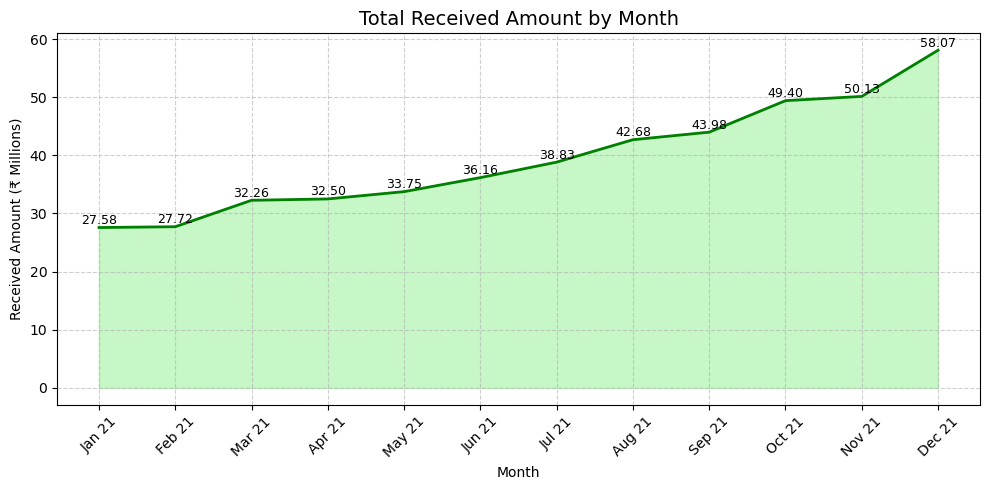

In [31]:
# 1. Data Processing
monthly_received = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
    .groupby('month_name', sort=False)['total_payment']
    .sum()
    .div(1000000)
    .reset_index(name='received_amount_millions')
)


# Assuming 'monthly_received' is a pandas DataFrame with at least two columns:
# 'month_name' and 'received_amount_millions'

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_received['month_name'], monthly_received['received_amount_millions'],
                 color='lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['received_amount_millions'],
         color='green', linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, f"{row['received_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount (₹ Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Monthly Trends By Issue Date For Total Loan Applications

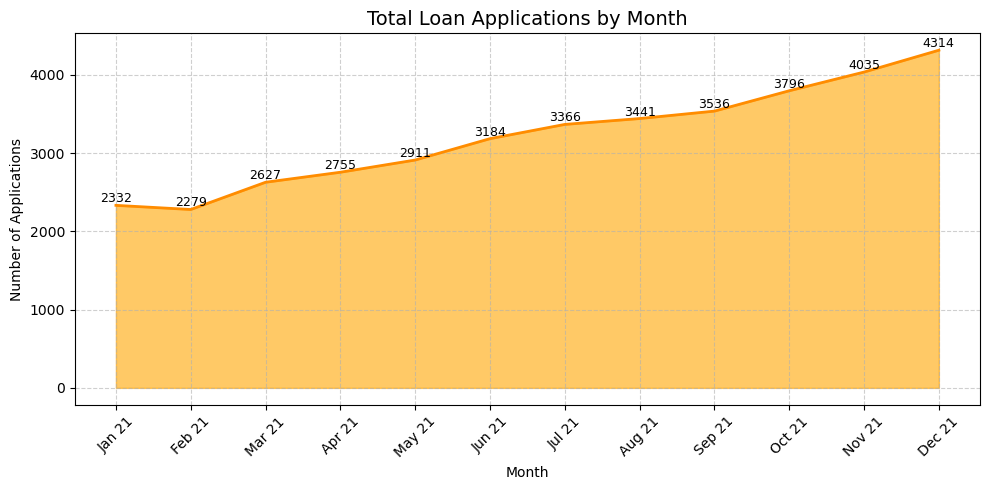

In [32]:
# This part of the code processes the data.
monthly_applications = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name='loan_applications_count')
)

# This part of the code creates the plot.
plt.figure(figsize=(10, 5))

# Plotting the filled area and the line
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_applications_count'],
                 color='orange', alpha=0.6)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'],
         color='darkorange', linewidth=2)

# Adding the count labels on top of each data point
for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, f"{row['loan_applications_count']}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')

# Custom
plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Regional Analysis by state funded amount

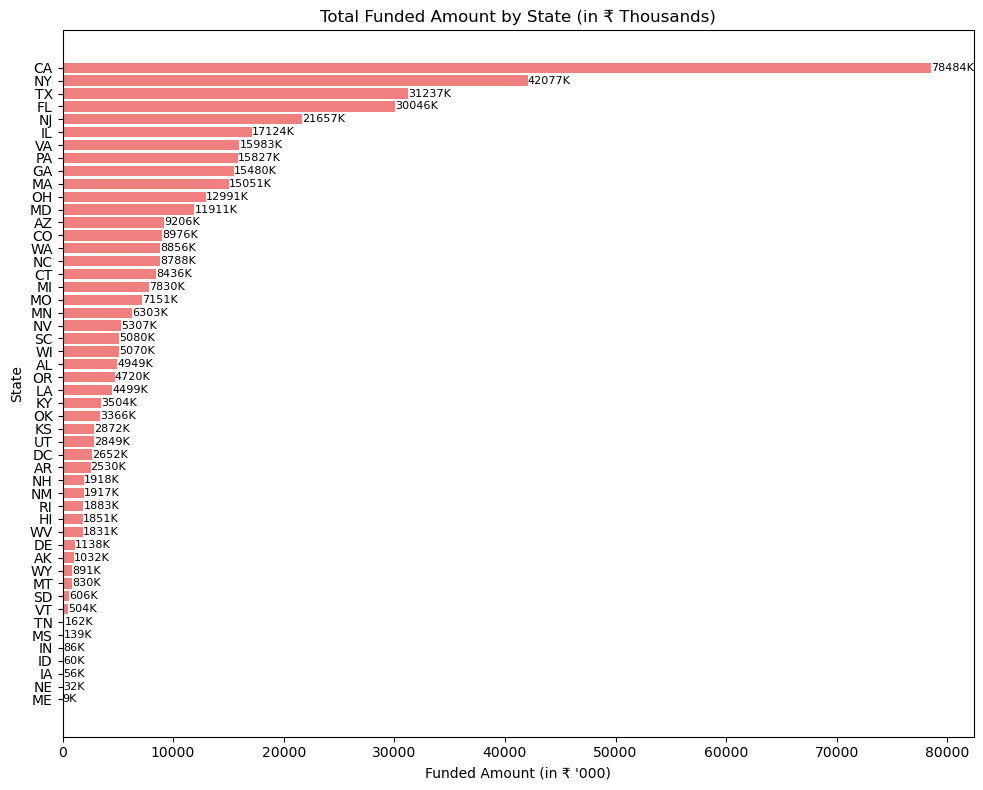

In [33]:
# Group data by state, sum the loan amounts, and sort them
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)

# Convert the loan amounts to thousands for better readability on the chart
state_funding_thousands = state_funding / 1000

# Set the figure size for the plot
plt.figure(figsize=(10, 8))

# Create a horizontal bar chart
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

# Loop through each bar to add a text label with its value
for bar in bars:
    width = bar.get_width()
    # Add text label at the end of each bar
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}K', va='center', fontsize=8)

# Set the title and labels for the chart
plt.title('Total Funded Amount by State (in ₹ Thousands)')
plt.xlabel('Funded Amount (in ₹ \'000)')
plt.ylabel('State')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the final plot
plt.show()

Regional Analysis by state Total Amount Recieved

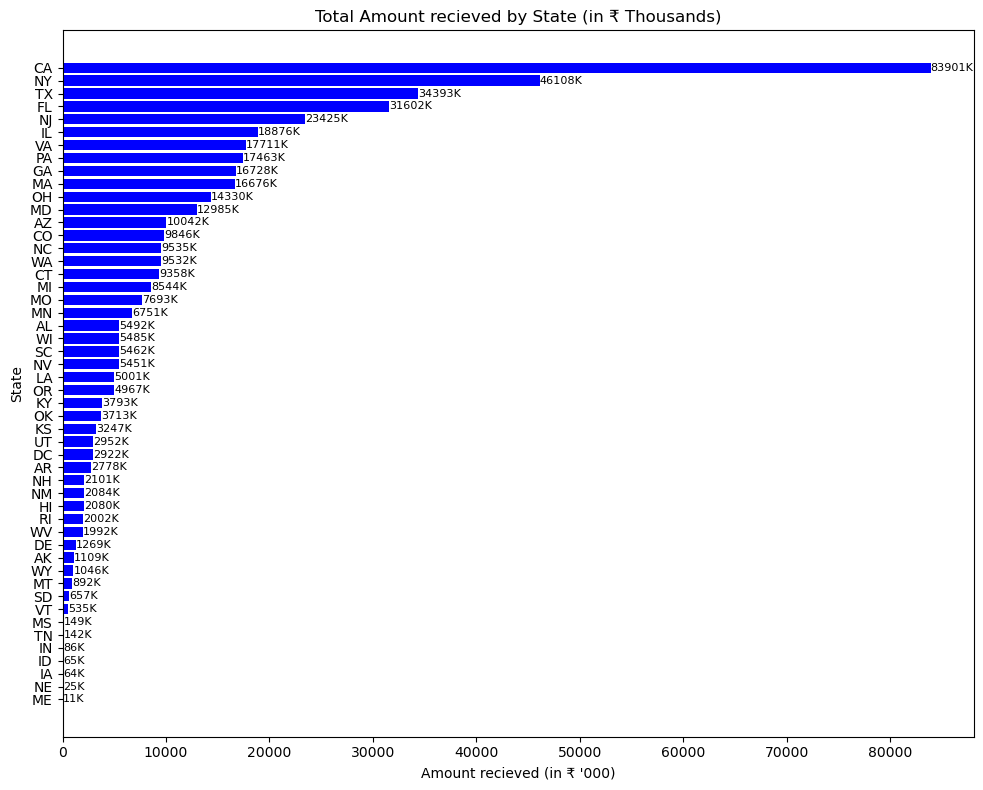

In [34]:
# Group data by state, sum the loan amounts, and sort them
state_amount_recieved = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)

# Convert the loan amounts to thousands for better readability on the chart
state_amount_recieved_thousands = state_amount_recieved / 1000

# Set the figure size for the plot
plt.figure(figsize=(10, 8))

# Create a horizontal bar chart
bars = plt.barh(state_amount_recieved_thousands.index, state_amount_recieved_thousands.values, color='blue')

# Loop through each bar to add a text label with its value
for bar in bars:
    width = bar.get_width()
    # Add text label at the end of each bar
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}K', va='center', fontsize=8)

# Set the title and labels for the chart
plt.title('Total Amount recieved by State (in ₹ Thousands)')
plt.xlabel('Amount recieved (in ₹ \'000)')
plt.ylabel('State')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the final plot
plt.show()

Regional Analysis by state Total Loan Applications

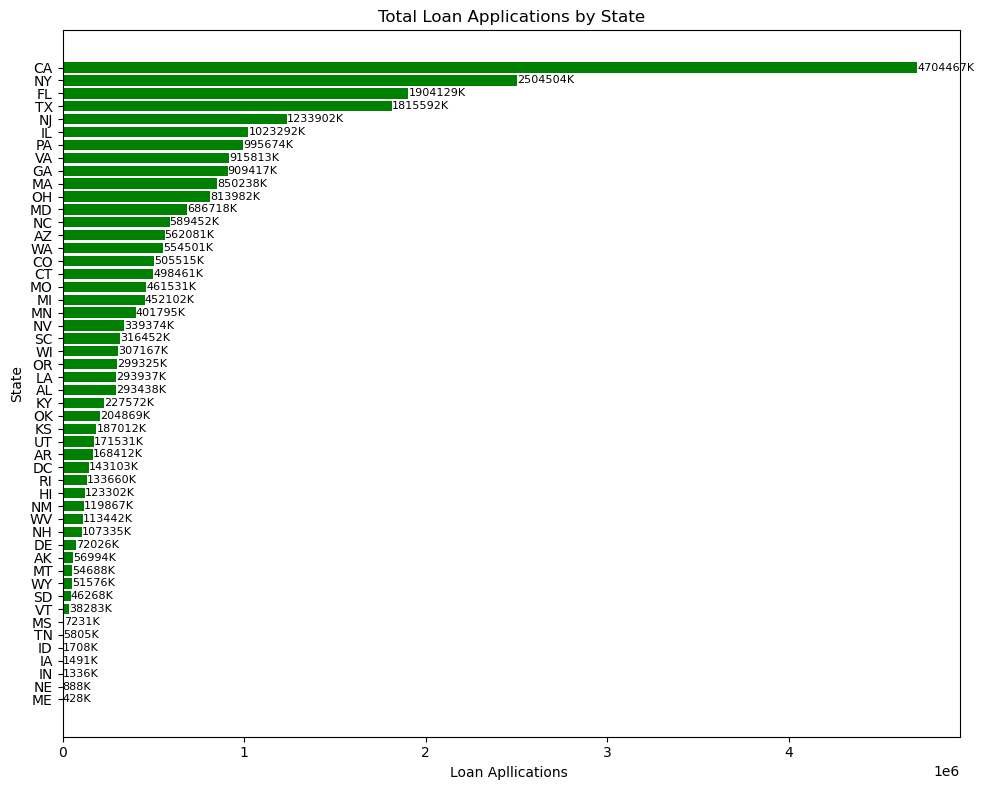

In [39]:

state_Total_loan_appliactions = df.groupby('address_state')['id'].sum().sort_values(ascending=True)

# Convert the loan amounts to thousands for better readability on the chart
state_Total_loan_appliactions_thousands = state_Total_loan_appliactions / 1000

# Set the figure size for the plot
plt.figure(figsize=(10, 8))

# Create a horizontal bar chart
bars = plt.barh(state_Total_loan_appliactions_thousands.index, state_Total_loan_appliactions_thousands.values, color='green')

# Loop through each bar to add a text label with its value
for bar in bars:
    width = bar.get_width()
    # Add text label at the end of each bar
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f'{width:.0f}K', va='center', fontsize=8)

# Set the title and labels for the chart
plt.title('Total Loan Applications by State')
plt.xlabel('Loan Apllications ')
plt.ylabel('State')

# Adjust layout to prevent labels from overlapping
plt.tight_layout()

# Display the final plot
plt.show()

Loan Term Analysis by Total funded amount

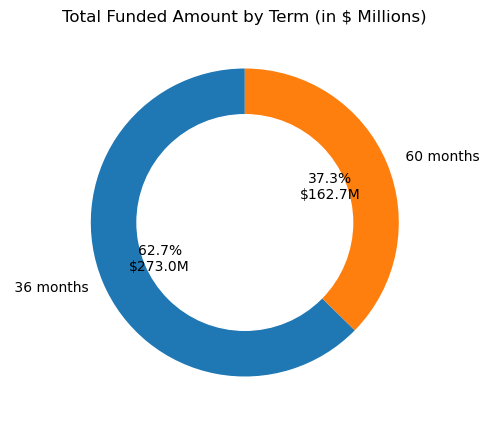

In [40]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.show()

Loan Term Analysis by Total Amount Recieved

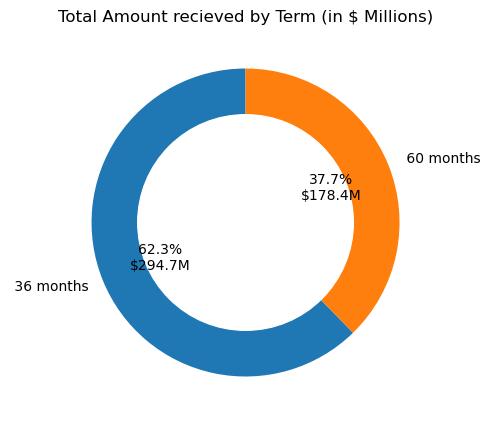

In [42]:
term_recieved_millions = df.groupby('term')['total_payment'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_recieved_millions,
    labels=term_recieved_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_recieved_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Amount recieved by Term (in $ Millions)")
plt.show()

Loan term Analysis by total applications

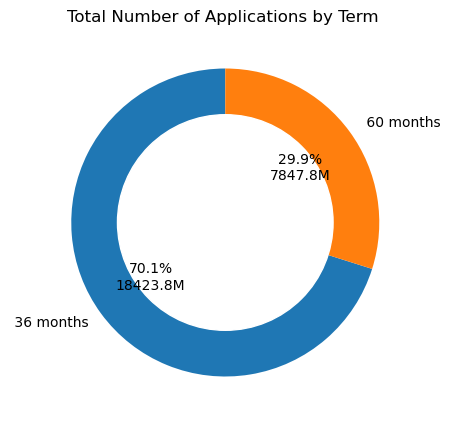

In [45]:
term_applications_millions = df.groupby('term')['id'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_applications_millions,
    labels=term_applications_millions.index,
    autopct=lambda p: f"{p:.1f}%\n{p*sum(term_applications_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Number of Applications by Term ")
plt.show()

Employee Length Analysis for Funded Amount

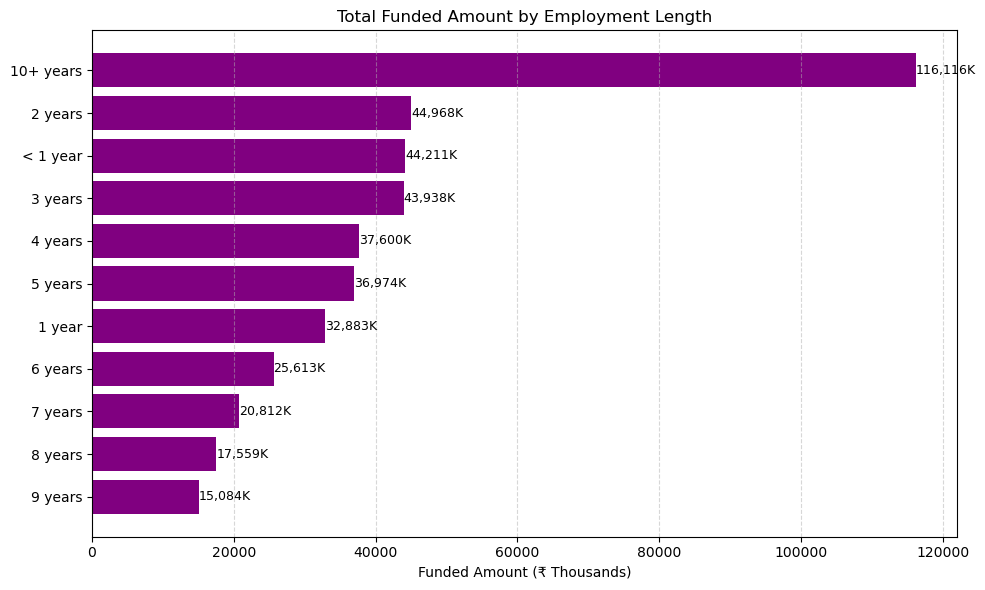

In [52]:
emp_funding_thousands = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding_thousands.index, emp_funding_thousands, color='purple')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K", va='center', fontsize=9)
plt.xlabel("Funded Amount (₹ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Employee Length Analysis for Recieved Amount

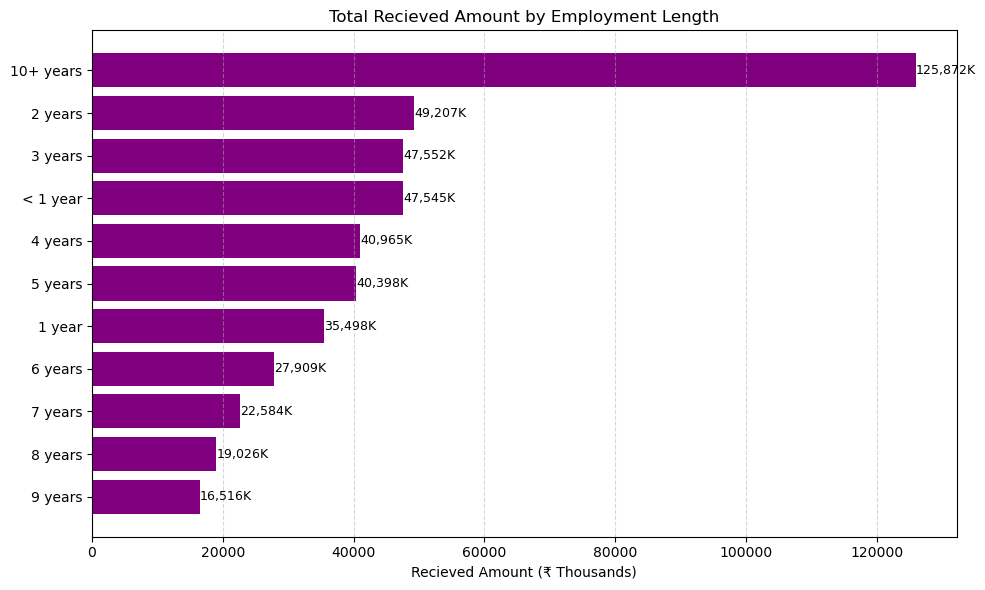

In [53]:
emp_recieved_thousands = df.groupby('emp_length')['total_payment'].sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_recieved_thousands.index, emp_recieved_thousands, color='purple')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K", va='center', fontsize=9)
plt.xlabel("Recieved Amount (₹ Thousands)")
plt.title("Total Recieved Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Employee Length Analysis for Total Loan Applications

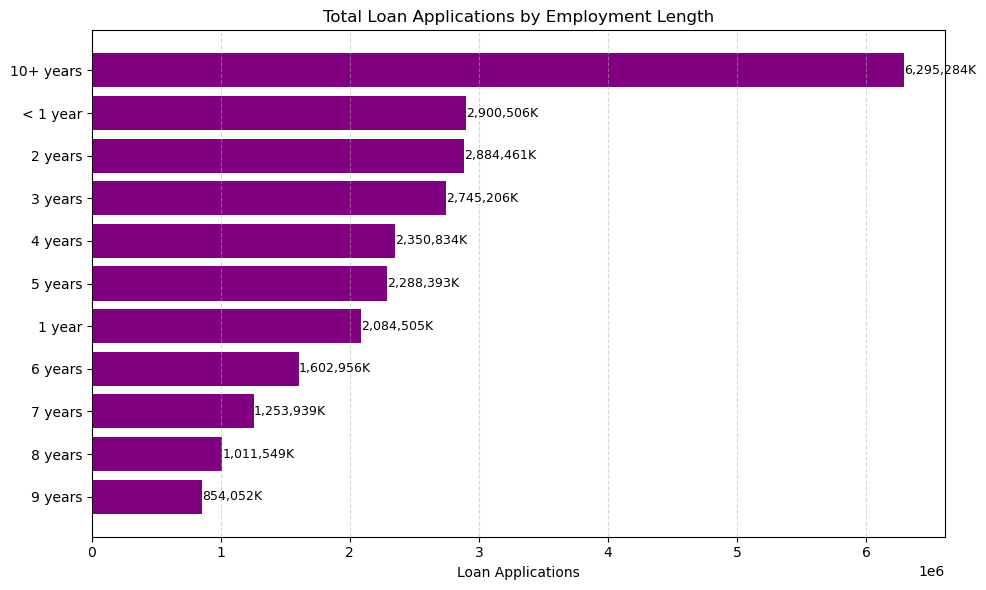

In [54]:
emp_Loan_Applications_thousands = df.groupby('emp_length')['id'].sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_Loan_Applications_thousands.index, emp_Loan_Applications_thousands, color='purple')
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K", va='center', fontsize=9)
plt.xlabel("Loan Applications")
plt.title("Total Loan Applications by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Loan Purpose by Total Funded Amount

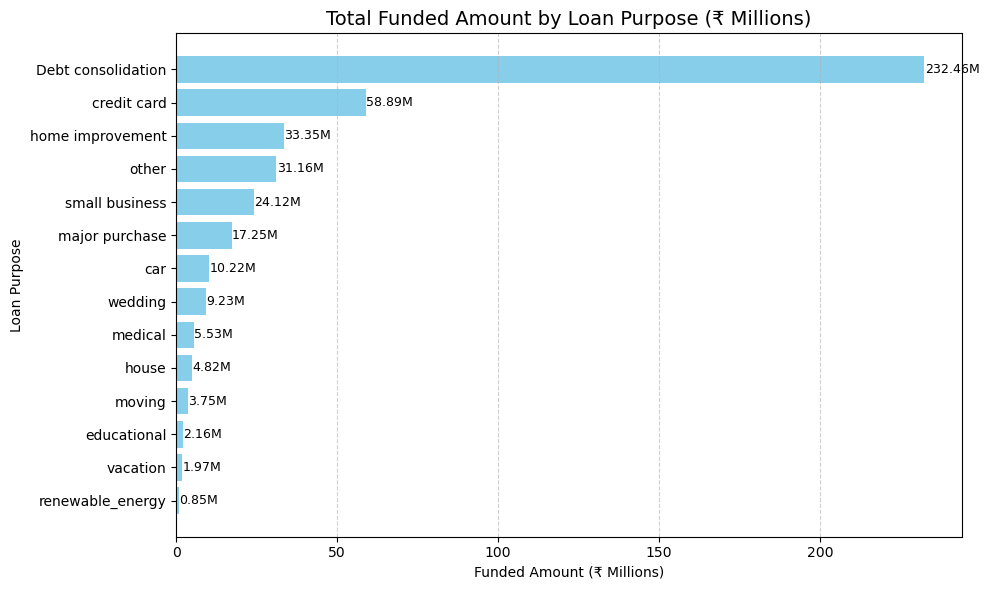

In [60]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values()) / 1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:,.2f}M', va='center', fontsize=9)
    
plt.title('Total Funded Amount by Loan Purpose (₹ Millions)', fontsize=14)
plt.xlabel('Funded Amount (₹ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Loan Purpose For Total Recieved Amount

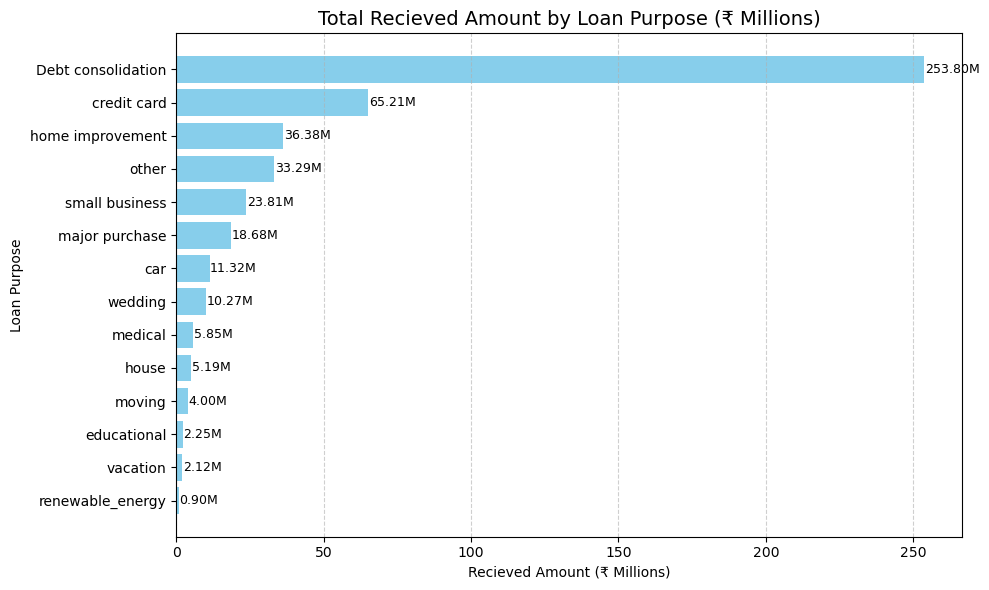

In [59]:
purpose_recieved_millions = (df.groupby('purpose')['total_payment'].sum().sort_values()) / 1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_recieved_millions.index, purpose_recieved_millions.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:,.2f}M', va='center', fontsize=9)
    
plt.title('Total Recieved Amount by Loan Purpose (₹ Millions)', fontsize=14)
plt.xlabel('Recieved Amount (₹ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Loan Purpose For Total Loan Applications

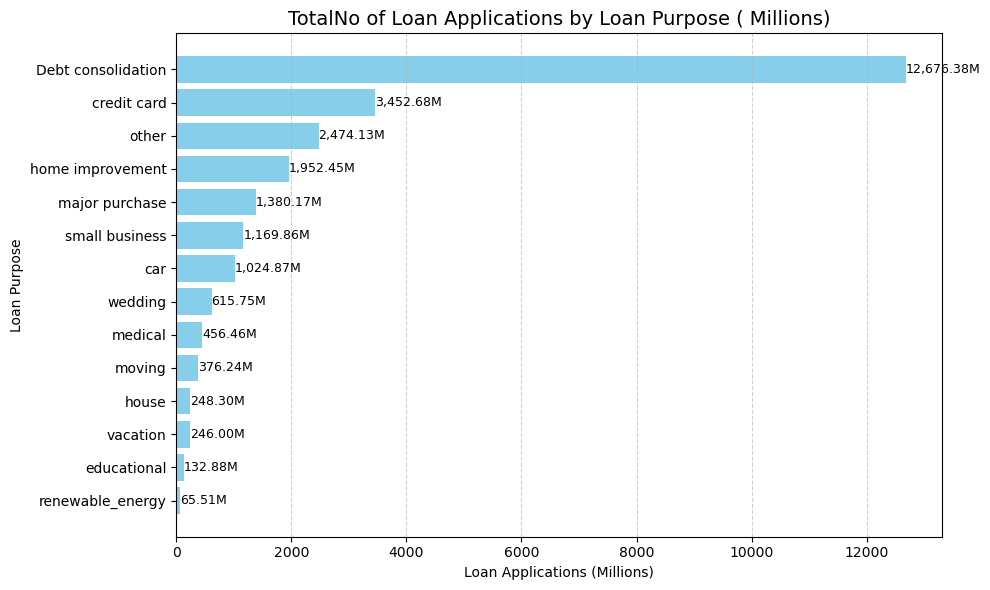

In [58]:
purpose_Loan_Applications_millions = (df.groupby('purpose')['id'].sum().sort_values()) / 1000000

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_Loan_Applications_millions.index, purpose_Loan_Applications_millions.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2,
             f'{width:,.2f}M', va='center', fontsize=9)
    
plt.title('TotalNo of Loan Applications by Loan Purpose ( Millions)', fontsize=14)
plt.xlabel('Loan Applications (Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Home Ownership Analysis by funded amount

In [61]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1_000_000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership (₹ Millions)'
)

fig.show()


Home Owernship Analysis by Recieved Amount

In [68]:
home_recieved = df.groupby('home_ownership')['total_payment'].sum().reset_index()
home_recieved['recieved_amount_millions'] = home_recieved['total_payment'] / 1_000_000

fig = px.treemap(
    home_recieved,
    path=['home_ownership'],
    values='recieved_amount_millions',
    color='recieved_amount_millions',
    color_continuous_scale='Blues',
    title='Total Recieved Amount by Home Ownership (₹ Millions)'
)

fig.show()


Home Ownership Analysis by Total Loan Apllications

In [70]:
home_Total_Loan_Applications = df.groupby('home_ownership')['id'].sum().reset_index()
home_Total_Loan_Applications['recieved_amount_millions'] = home_Total_Loan_Applications['id'] / 1_000_000

fig = px.treemap(
    home_Total_Loan_Applications,
    path=['home_ownership'],
    values='recieved_amount_millions',
    color='recieved_amount_millions',
    color_continuous_scale='Blues',
    title='Total Loan Applications by Home Ownership'
)

fig.show()
